In [1]:
import pickle as pkl
def save(arr,fileName):
    fileObject = open(fileName, 'wb')
    pkl.dump(arr, fileObject)
    fileObject.close()
def load(fileName):
    fileObject2 = open(fileName, 'rb')
    modelInput = pkl.load(fileObject2)
    fileObject2.close()
    return modelInput
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import networkx as nx

In [5]:
#data_gly = load('./data_dic_sasa_gly.pkl')
#data_ngly = load('./data_dic_sasa_nongly.pkl')
data = load('Scaffold_check/data_dic_scaffold_check.pkl')

In [6]:
data

{'1OLT':            clsEn        SASA
 0       2.674147  162.803777
 1       2.674147  162.803777
 2       2.674147  162.803777
 3       2.674147  162.803777
 4       2.674147  162.803777
 ...          ...         ...
 1870  279.382015  144.743149
 1871  279.382015  144.743149
 1872  279.382015  144.743149
 1873  279.382015  144.743149
 1874  279.382015  144.743149
 
 [1875 rows x 2 columns],
 '1R30':            clsEn       SASA
 0       6.726287  21.909048
 1       6.726287  21.909048
 2       6.726287  21.909048
 3       6.726287  21.909048
 4       6.726287  21.909048
 ...          ...        ...
 1870  387.224628  32.884617
 1871  387.224628  32.884617
 1872  387.224628  32.884617
 1873  387.224628  32.884617
 1874  387.224628  32.884617
 
 [1875 rows x 2 columns],
 '1TV8':            clsEn        SASA
 0       1.585384  138.972377
 1       1.585384  138.972377
 2       1.585384  138.972377
 3       1.585384  138.972377
 4       1.585384  138.972377
 ...          ...         ...
 1

In [89]:
len(data)

19

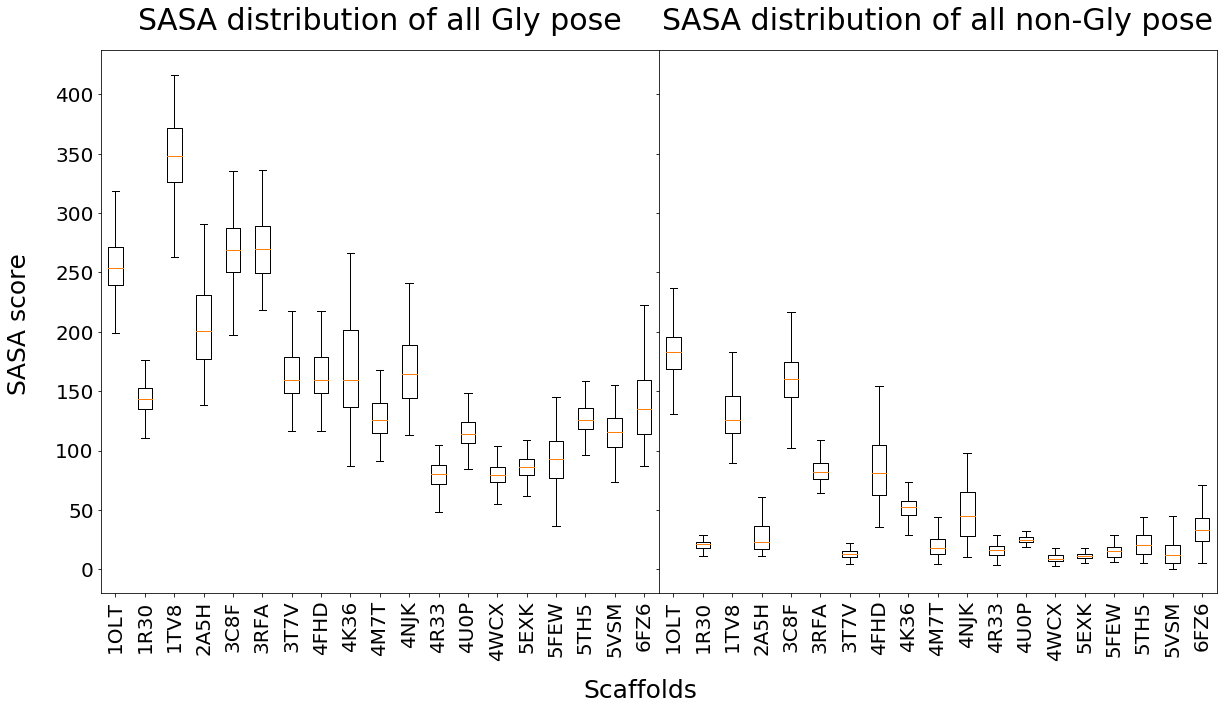

In [82]:
fig,axes = plt.subplots(1,2,figsize=(20,10),sharey=True)
axs = [axes[0],axes[1]]

ax1 = axs[0]
# plotting for gly pose
for i in range(len(data_gly)):
    data_to_plot =[]
    for key in data_gly:
        df = data_gly[key]
        spread = df.values[:,0]
        data_to_plot.append(spread)
        #names.append(df.values[:,0][0].split('_')[0])

ax1.set_title('SASA distribution of all Gly pose', fontsize=30, pad=20)

ax1.boxplot(data_to_plot, showfliers=False)
plt.setp(ax1, xticks=range(1, len(data_gly)+1), xticklabels=data_gly.keys())
#plt.xlabel('Scaffolds',labelpad=20, fontsize=18)
#plt.ylabel('SASA score', labelpad=30, fontsize=18)
#ax.set_xlabel('Scaffolds', labelpad=20)
#plt.xlabel('Scaffolds',labelpad=20, fontsize=18)
ax1.tick_params(axis='both', labelsize= 20)
labels = ax1.get_xticklabels()
for i in labels:
        i.set_rotation(90)

ax2 = axs[1]
# plotting for gly pose
for i in range(len(data_ngly)):
    data_to_plot =[]
    for key in data_ngly:
        df = data_ngly[key]
        spread = df.values[:,0]
        data_to_plot.append(spread)
        #names.append(df.values[:,0][0].split('_')[0])

ax2.set_title('SASA distribution of all non-Gly pose', fontsize=30, pad=20)

ax2.boxplot(data_to_plot, showfliers=False)
plt.setp(ax2, xticks=range(1, len(data_ngly)+1), xticklabels=data_ngly.keys())
ax2.tick_params(axis='both', labelsize= 20)
labels = ax2.get_xticklabels()
for i in labels:
        i.set_rotation(90)      
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0, hspace=0.3) 

#Set up xy labels
fig.text(0.5, -0.02, 'Scaffolds', ha='center', fontsize=25)
fig.text(0.06, 0.5, 'SASA score', va='center', rotation='vertical', fontsize=25)

y_ticks = list(range(0,450,50))
plt.yticks(y_ticks)

plt.savefig('./SASA_box.pdf',dpi = 300, bbox_inches = "tight")


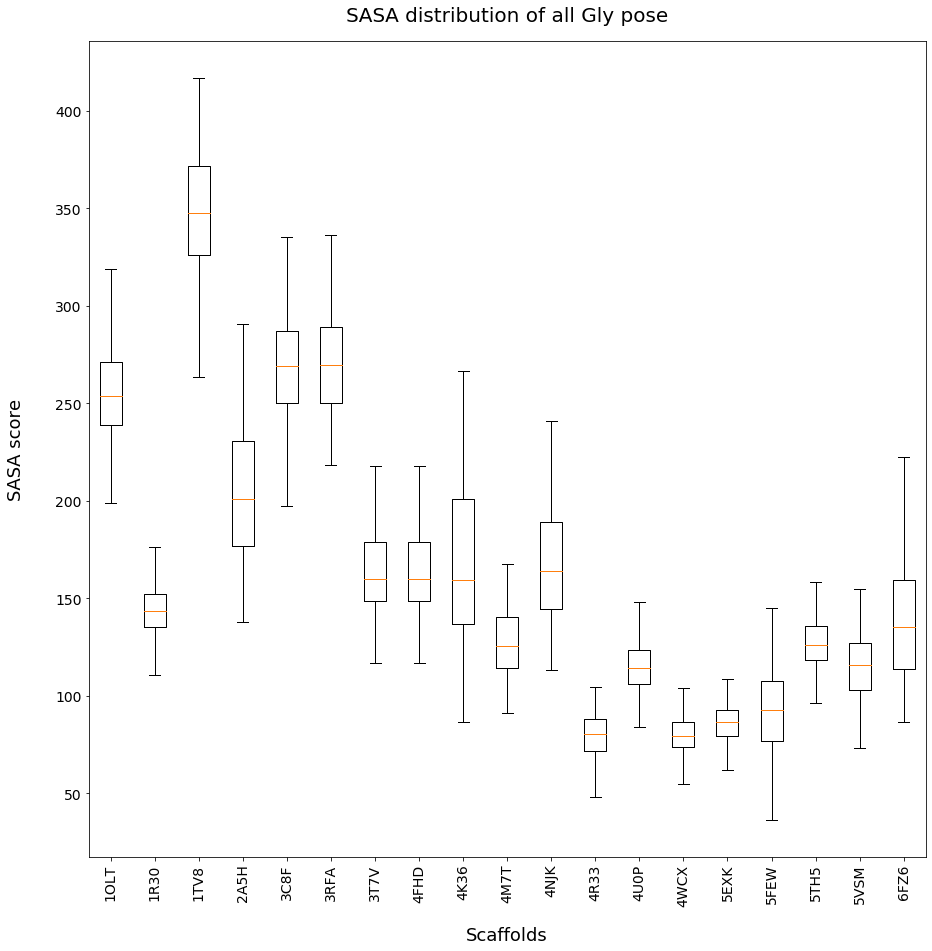

In [30]:
fig,axes = plt.subplots(1,1,figsize=(15,15),sharey=True)

# plotting for gly pose
for i in range(len(data_ngly)):
    data_to_plot =[]
    for key in data_ngly:
        df = data_ngly[key]
        spread = df.values[:,0]
        data_to_plot.append(spread)
        #names.append(df.values[:,0][0].split('_')[0])

axes.set_title('SASA distribution of all Gly pose', fontsize=20, pad=20)

axes.boxplot(data_to_plot, showfliers=False)
plt.setp(axes, xticks=range(1, len(data_ngly)+1), xticklabels=data_ngly.keys())
plt.xlabel('Scaffolds',labelpad=20, fontsize=18)
plt.ylabel('SASA score', labelpad=30, fontsize=18)
axes.tick_params(axis='both', labelsize= 14)
labels = axes.get_xticklabels()
for i in labels:
        i.set_rotation(90)
#plt.savefig('./box_.pdf',dpi = 300, bbox_inches = "tight")



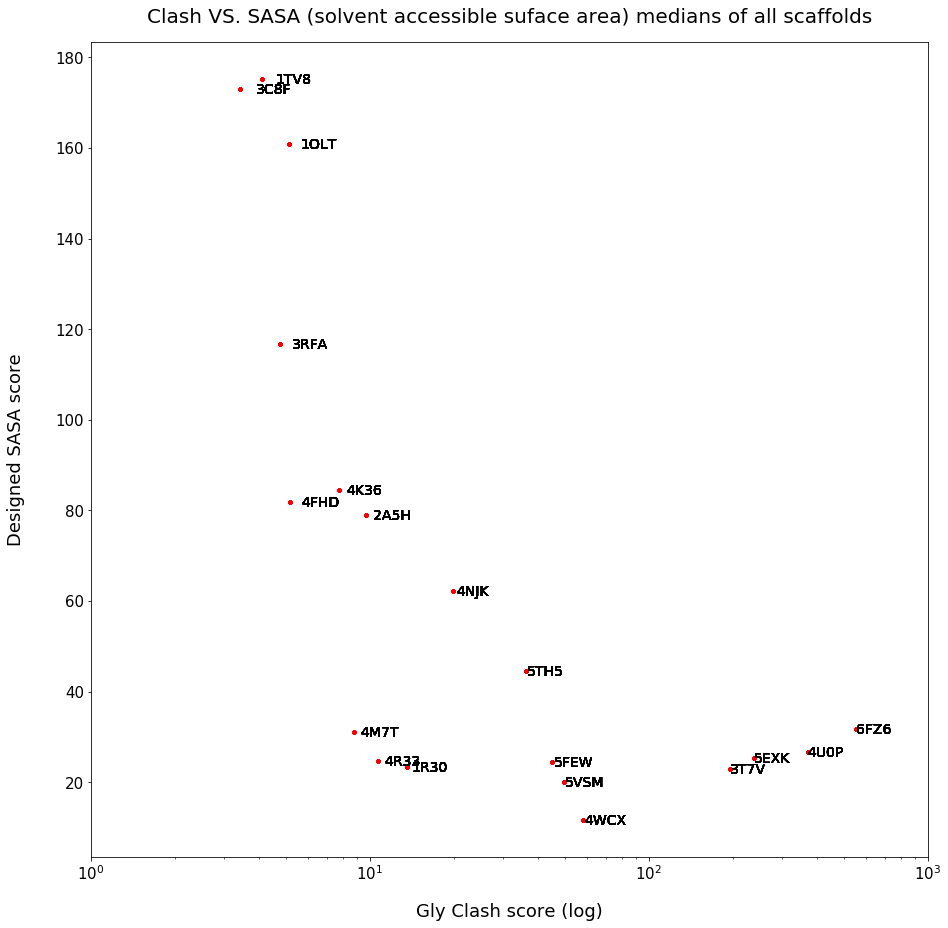

In [16]:
fig,axes = plt.subplots(1,1,figsize=(15,15),sharey=True)


for i in range(len(data)):
    mediansC = []
    #ave_per_C = []
    avesC = []
    mediansSA = []
    avesSA = []
    #ave_per_SA = []
    for key in data:
        df = data[key]
        clash = df.values[:,0]
        medianC = np.median(clash)
        mediansC.append(medianC)
        aveC = np.average(clash)
        avesC.append(aveC)
        #upperC = np.percentile(clash,75)-medianC
        #lowerC = medianC-np.percentile(clash,25)
        #ave_per_C.append(np.average([upperC,lowerC]))
               
        
        SASA = df.values[:,1]
        medianSA = np.median(SASA)
        mediansSA.append(medianSA)
        aveSA = np.average(SASA)
        avesSA.append(aveSA)
        #upperSA = np.percentile(SASA,75)-medianSA
        #lowerSA = medianSA-np.percentile(SASA,25)
        #ave_per_SA.append(np.average([upperSA,lowerSA]))
        
    axes.semilogx(mediansC, mediansSA, '.r')    
    #axes.semilogx(avesC, avesSA,'.r')   
        
    
    #axes.errorbar(mediansC,mediansSA, yerr=ave_per_SA, xerr=ave_per_C,capsize=2,fmt='.b')

    for j, txt in enumerate(data.keys()):
        axes.annotate(txt, (mediansC[j]+0.5, mediansSA[j]-1), fontsize=14)
        #axes.annotate(txt, (avesC[j]+0.01, avesSA[j]+2), fontsize=14)
        '''
        axes.annotate(txt, (mediansC[j]+0.01, mediansSA[j]+2), fontsize=14,
            textcoords='offset points', ha='center', va='bottom',
                bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.1),
                    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5',color='red'))
        '''
    
axes.set_title('Clash VS. SASA (solvent accessible suface area) medians of all scaffolds',fontsize= 20, pad=20)
    
plt.xlabel('Gly Clash score (log)',labelpad=20, fontsize=18)
plt.ylabel('Designed SASA score', labelpad=30, fontsize=18)
axes.tick_params(axis='both', labelsize= 15)
plt.xlim(1,1000)


plt.savefig('clash_SASA.pdf',dpi = 300, bbox_inches = "tight")


In [50]:
ave_per_C

[1.7365749999999998,
 12.957550000000001,
 0.9987500000000002,
 9.552025,
 1.0044,
 1.546625,
 257.264575,
 2.2444249999999997,
 6.030749999999999,
 7.7509250000000005,
 46.801550000000006,
 14.275625,
 303.3487,
 82.895925,
 186.415375,
 58.707825,
 104.5036,
 34.88095,
 910.843625]

In [31]:
ave_per_SA

[255.1935376553895,
 143.8311466691019,
 348.8736605594005,
 203.7973940626711,
 268.69153011787813,
 269.5937315325833,
 163.784588435942,
 163.784588435942,
 168.83133401964074,
 127.32979744754552,
 166.78009703113986,
 79.85134206690125,
 114.90813402072396,
 80.04177300233164,
 86.15306858850124,
 92.20793380144436,
 126.90010320346869,
 115.02991921741864,
 136.5578748623604]